In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split


In [2]:
trainset = pd.read_csv('Data\credit_card_default_train.csv', index_col='Client_ID' )

In [3]:
testset = pd.read_csv('Data\credit_card_default_test.csv', index_col='Client_ID' )

In [4]:
testset = testset.sort_values('Client_ID')

In [5]:
trainset

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,...,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,
A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,-1,...,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,-1,...,43530,80811,124590,151818,46200,43530,80811,942,33666,0
A4,100K,F,High School,Single,31-45,4,3,2,2,-2,...,0,0,0,0,0,0,0,0,0,1
A5,200K,F,Graduate,Single,31-45,2,0,0,0,0,...,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
A6,1M,F,Graduate,Other,31-45,2,2,0,0,0,...,435354,445271,453899,0,20790,16170,17325,16401,17325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A29996,1M,F,High School,Single,31-45,0,0,0,0,0,...,203289,72157,36914,19635,46200,11557,7039,11550,2310,0
A29997,400K,F,High School,Other,31-45,-1,-1,-1,-1,0,...,20741,11989,0,4243,8145,20785,298,0,0,0
A29998,100K,F,Other,Other,31-45,4,3,2,-1,0,...,48228,47544,44715,0,0,50820,9702,4620,7161,1


In [6]:
trainset['Balance_Limit_V1'] = trainset['Balance_Limit_V1'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [7]:
testset['Balance_Limit_V1'] = testset['Balance_Limit_V1'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [42]:
trainset.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,...,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,
A2,1000000,M,Graduate,Other,31-45,-1,-1,-1,-1,-1,...,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
A3,1000000,F,High School,Other,Less than 30,0,-1,-1,-1,-1,...,43530,80811,124590,151818,46200,43530,80811,942,33666,0
A4,100000,F,High School,Single,31-45,4,3,2,2,-2,...,0,0,0,0,0,0,0,0,0,1
A5,200000,F,Graduate,Single,31-45,2,0,0,0,0,...,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
A6,1000000,F,Graduate,Other,31-45,2,2,0,0,0,...,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [33]:
trainset.dtypes

Balance_Limit_V1       int32
Gender                object
EDUCATION_STATUS      object
MARITAL_STATUS        object
AGE                   object
PAY_JULY               int64
PAY_AUG                int64
PAY_SEP                int64
PAY_OCT                int64
PAY_NOV                int64
PAY_DEC                int64
DUE_AMT_JULY           int64
DUE_AMT_AUG            int64
DUE_AMT_SEP            int64
DUE_AMT_OCT            int64
DUE_AMT_NOV            int64
DUE_AMT_DEC            int64
PAID_AMT_JULY          int64
PAID_AMT_AUG           int64
PAID_AMT_SEP           int64
PAID_AMT_OCT           int64
PAID_AMT_NOV           int64
PAID_AMT_DEC           int64
NEXT_MONTH_DEFAULT     int64
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [10]:
encode_columns = ['AGE']
encode_df = trainset[encode_columns]
encode_df = encode_df.astype('str')
le = LabelEncoder()
encode_df = encode_df.apply(le.fit_transform)
score_encode_drop = trainset.drop(encode_columns, axis = 1)
score_encode = pd.concat([score_encode_drop, encode_df], axis = 1)

In [11]:
encode_df_test = testset[encode_columns]
encode_df_test = encode_df_test.astype('str')
encode_df_test = encode_df_test.apply(le.fit_transform)
score_encode_drop_test = testset.drop(encode_columns, axis = 1)
score_encode_test = pd.concat([score_encode_drop_test, encode_df_test], axis = 1)


In [12]:
onehot_columns =  ['MARITAL_STATUS', 'EDUCATION_STATUS', 'Gender']
onehot_df = score_encode[onehot_columns]
onehot_df = pd.get_dummies(onehot_df, columns = onehot_columns)
score_onehot_drop = score_encode.drop(onehot_columns, axis = 1)
score_onehot = pd.concat([score_onehot_drop, onehot_df], axis = 1)

In [14]:
onehot_df_test = score_encode_test[onehot_columns]
onehot_df_test = pd.get_dummies(onehot_df_test, columns = onehot_columns)
score_onehot_drop_test = score_encode_test.drop(onehot_columns, axis = 1)
score_onehot_test = pd.concat([score_onehot_drop_test, onehot_df_test], axis = 1)

In [15]:
New = score_onehot.drop(['Gender_M', 'MARITAL_STATUS_Other','Gender_F','EDUCATION_STATUS_Other','EDUCATION_STATUS_High School','EDUCATION_STATUS_Graduate','MARITAL_STATUS_Single','AGE'], axis=1)

In [16]:
train_all, test_all = train_test_split(score_onehot, test_size=0.30, random_state=42)

In [17]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics 
from sklearn.model_selection import cross_validate, GridSearchCV

In [18]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['NEXT_MONTH_DEFAULT'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['NEXT_MONTH_DEFAULT'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['NEXT_MONTH_DEFAULT'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

    return alg

In [19]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [20]:
target = 'NEXT_MONTH_DEFAULT'
IDcol = 'Client_ID'
predictors = [x for x in score_onehot.columns if x not in [target, IDcol]]


Model Report
Accuracy : 0.8293
AUC Score (Train): 0.814113


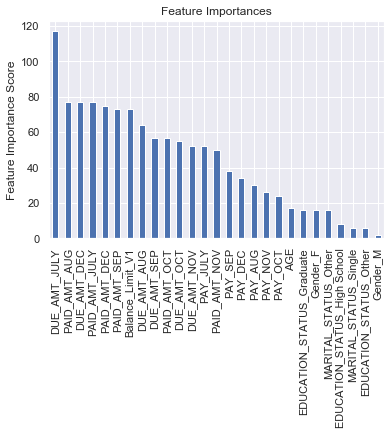

In [21]:
model = modelfit(xgb1, score_onehot, predictors)

In [140]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(score_onehot[predictors],score_onehot[target])

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [150]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.7794667630043282)

In [156]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[1,2]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(score_onehot[predictors],score_onehot[target])

AttributeError: 'GridSearchCV' object has no attribute 'best_score'

In [157]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 3, 'min_child_weight': 2}, 0.7794799022420614)

In [166]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch3.fit(score_onehot[predictors],score_onehot[target])
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.4}, 0.7763348510869642)


Model Report
Accuracy : 0.8307
AUC Score (Train): 0.814669


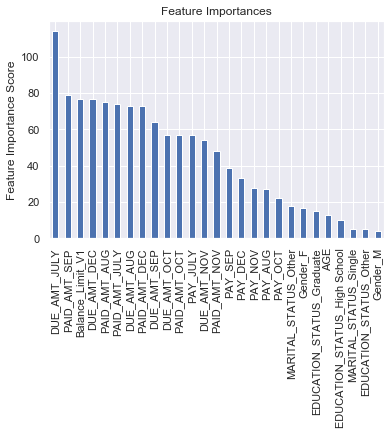

In [22]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model_2 = modelfit(xgb2, score_onehot, predictors)

In [168]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=1, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch4.fit(score_onehot[predictors],score_onehot[target])

gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.7, 'subsample': 0.8}, 0.7761521327771475)

In [169]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=1, gamma=0.4, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(score_onehot[predictors],score_onehot[target])

gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 100}, 0.7779598708083821)

In [219]:
out  = model_2.predict(score_onehot_test[predictors])

In [222]:
df = pd.DataFrame(out)

In [225]:
df.to_csv('out.csv')

In [218]:
score_onehot_test[predictors]

,Balance_Limit_V1,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,...,PAID_AMT_NOV,PAID_AMT_DEC,AGE,MARITAL_STATUS_Other,MARITAL_STATUS_Single,EDUCATION_STATUS_Graduate,EDUCATION_STATUS_High School,EDUCATION_STATUS_Other,Gender_F,Gender_M
Client_ID,,,,,,,,,,,,,,,,,,,,,
A1,200000,0,0,0,0,0,0,117050,116713,88334,...,1901,3001,1,1,0,0,0,1,0,1
A10,100000,0,0,0,0,0,0,34664,37343,39640,...,0,0,2,1,0,0,0,1,1,0
A10008,300000,2,2,2,0,0,2,86662,89217,87101,...,0,3333,0,0,1,0,0,1,0,1
A10009,1000000,1,-1,-1,-2,-2,-2,1134,8478,-263,...,0,0,1,0,1,1,0,0,0,1
A10011,400000,1,-2,-1,-1,-2,-2,5408,785,878,...,614,0,2,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A9983,100000,-1,-1,-1,-1,-1,-1,7702,7775,2056,...,0,13860,1,0,1,0,0,1,0,1
A9990,1000000,0,0,0,0,-1,0,581683,593099,330884,...,34650,34650,2,0,1,0,0,1,0,1
A9992,100000,1,2,2,-2,-2,-2,11927,5717,0,...,0,0,1,0,1,0,0,1,0,1



Model Report
Accuracy : 0.8662
AUC Score (Train): 0.902284


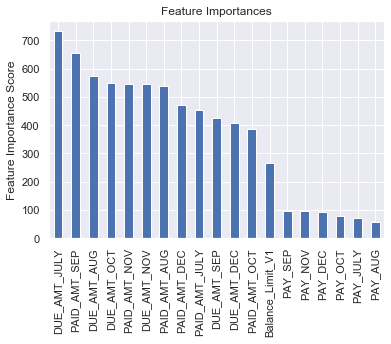

In [23]:
predictorsnew = [x for x in New.columns if x not in [target, IDcol]]
xgb_new = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=1,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model_2 = modelfit(xgb_new, New, predictorsnew)

In [33]:
from sklearn.metrics import f1_score
def f1score(m, train, test, predictorsnew): 
    predictions_lgbm_01 = np.where(m.predict(train[predictorsnew]) > 0.5, 1, 0)
    predictions_lgbm_02 = np.where(m.predict(test[predictorsnew]) > 0.5, 1, 0)
    return (f1_score(train[target],predictions_lgbm_01),f1_score(test[target],predictions_lgbm_02))

In [25]:
train_all, test_all = train_test_split(New, test_size=0.30, random_state=42)

In [34]:
f1score(model_2,train_all, test_all, predictorsnew)

(0.6109768726268554, 0.6123276561232766)

<Figure size 432x288 with 0 Axes>

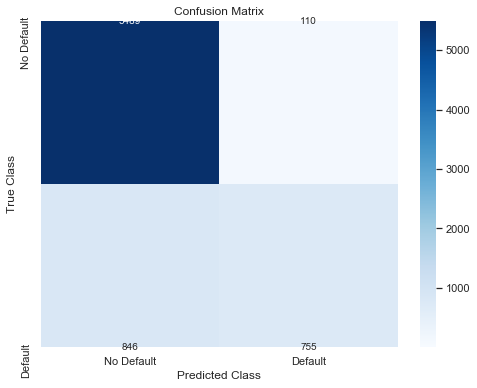

In [36]:
#Print Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
predictions_lgbm_02 = np.where(model_2.predict(test_all[predictorsnew]) > 0.5, 1, 0)

plt.figure()
cm = confusion_matrix(test_all[target], predictions_lgbm_02)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [266]:
out2  = model_2.predict(score_onehot_test[predictorsnew])

In [267]:
df2 = pd.DataFrame(out2)

In [269]:
df2.to_csv('out2.csv')

In [8]:
trainset.MARITAL_STATUS.unique()

array(['Other', 'Single'], dtype=object)